# Pymaceuticals Inc.
---

### Analysis

- The most noticeable result that is shown with a statistical analysis of the study is that amoung all the drug regimen there are two that shrunk the size of the tumor, which are Capomulin and Ramicane. Each mouse started the study with a tumor of 45mm3, and after the study the mouses that were in this drug regimen had an average tumor volume of 40mm3 and a standard deviation of around 5. The other studies had an average between 52 ang 55 mm3, and the standard deviation between 6 and 8.
- Another observation is that there is a positive correlation between the mouse weight and the tumor volume in the Capomulin regimen. This was a correlation of 0.84, which is very strong, meaning that it is a reliable prediction to assume that mouses with higher weight will have a larger tumor volume for mouses in the Capomulin regimen.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data_df = pd.merge(study_results,mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
complete_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_count = mouse_metadata["Mouse ID"].count()
mice_count

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_check_df = complete_data_df[["Mouse ID","Timepoint"]]
duplicate_df = duplicate_check_df.loc[duplicate_check_df.duplicated()]
duplicate_df
duplicate_mouse_id = duplicate_df["Mouse ID"].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

complete_data_df.loc[complete_data_df["Mouse ID"] == duplicate_mouse_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = complete_data_df.loc[complete_data_df["Mouse ID"] != duplicate_mouse_id[0]]
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count2 = len(clean_data_df["Mouse ID"].unique())
mice_count2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_df = clean_data_df[["Tumor Volume (mm3)","Drug Regimen"]].groupby("Drug Regimen")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = tumor_volume_df.mean().rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})
median = tumor_volume_df.median().rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})
variance = tumor_volume_df.var().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})
std_dev = tumor_volume_df.std().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})
sem = tumor_volume_df.sem().rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})

# Assemble the resulting series into a single summary DataFrame.
summary_df = mean.merge(median,on="Drug Regimen").merge(variance, on="Drug Regimen").merge(std_dev, on="Drug Regimen").merge(sem,on="Drug Regimen")
summary_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
aggregation_df = tumor_volume_df.agg({"Tumor Volume (mm3)":['mean','median','var','std','sem']})
aggregation_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

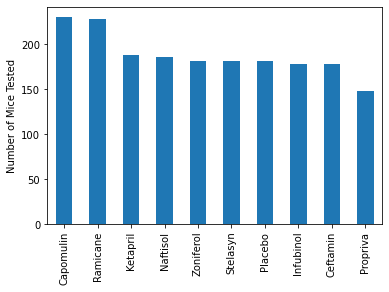

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# tumor_volume_df.count().sort_values(by="Tumor Volume (mm3)",ascending=False)
data_df = clean_data_df[["Drug Regimen","Tumor Volume (mm3)"]]
data2_df = data_df["Drug Regimen"].value_counts()
data2_df.plot(kind='bar',legend=False)
plt.ylabel("Number of Mice Tested")
plt.show()

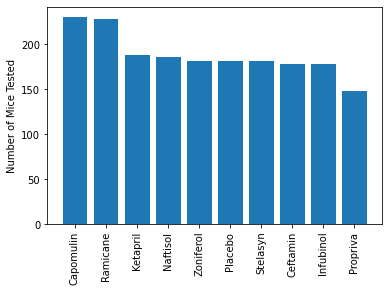

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
tumor_volume_df2 = tumor_volume_df.count().sort_values(by="Tumor Volume (mm3)",ascending = False).reset_index()
plt.bar(tumor_volume_df2["Drug Regimen"],tumor_volume_df2["Tumor Volume (mm3)"])
plt.xticks(range(len(tumor_volume_df2)),tumor_volume_df2["Drug Regimen"],rotation='vertical')
plt.ylabel("Number of Mice Tested")
plt.show()

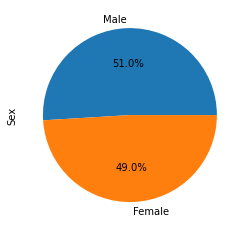

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas              
sex_df = clean_data_df["Sex"].value_counts()
sex_df.plot(kind='pie',legend=False, autopct = "%0.1f%%", subplots=True)
plt.show()

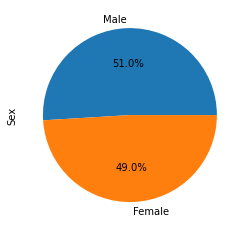

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_df,labels=sex_df.index,autopct="%0.1f%%")
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
filtered_df = pd.merge(clean_data_df,max_timepoint, how="inner",on = ["Mouse ID","Timepoint"])

filtered_df = filtered_df.sort_values("Mouse ID").reset_index()

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for regimen in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_tumor_df = filtered_df["Tumor Volume (mm3)"].loc[filtered_df["Drug Regimen"] == regimen]
    
    # add subset 
    regimen_tumor_volume_list = list(regimen_tumor_df)
    tumor_vol_data.append(regimen_tumor_volume_list)
    
    # Determine outliers using upper and lower bounds
    quartiles = regimen_tumor_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = regimen_tumor_df.loc[(regimen_tumor_df > upper_bound) | (regimen_tumor_df < lower_bound)]
    print(f"{regimen}'s potntial outliers: {outliers}")

Capomulin's potntial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potntial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potntial outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potntial outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


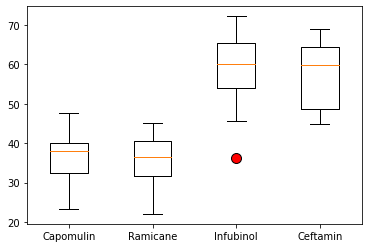

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker = 'o',markerfacecolor = 'red', markersize = 10)
box = plt.boxplot(tumor_vol_data,labels = treatment_list, flierprops = flierprops)
plt.show()

## Line and Scatter Plots

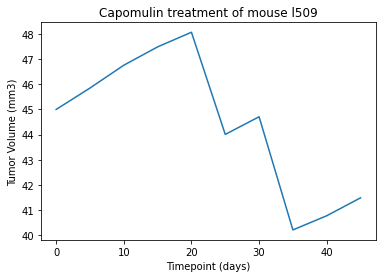

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_time_df = clean_data_df[["Tumor Volume (mm3)","Timepoint"]].loc[clean_data_df["Mouse ID"] == "l509"]
plt.plot(tumor_time_df["Timepoint"],tumor_time_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()


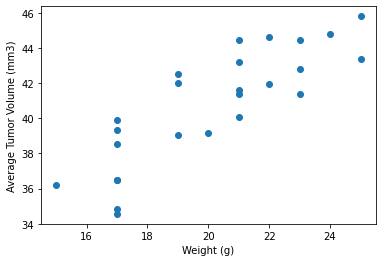

In [44]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_weight_df = clean_data_df[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].loc[clean_data_df["Drug Regimen"] == "Capomulin"]
tumor_weight_df2 = tumor_weight_df.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
x_values = tumor_weight_df2["Weight (g)"]
y_values = tumor_weight_df2["Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


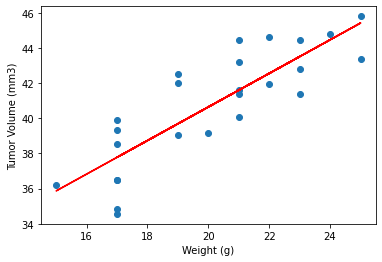

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Creating the plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

# Print the correlation coefficient
print(f"The correlation between mouse weight \033[1mand\033[0m the average tumor volume \033[1mis\033[0m {round(st.pearsonr(x_values,y_values)[0],2)}")

plt.show()